In [1]:
"""
Objectives

1. Create multiple Nodes that sequentially process and update different parts of the state.
2. Connect Nodes together in a graph.
3. Invoke the graph and see how the state is transformed step-by-step.

Main Goal: Create and handle multiple Nodes.

"""

'\nObjectives\n\n1. Create multiple Nodes that sequentially process and update different parts of the state.\n2. Connect Nodes together in a graph.\n3. Invoke the graph and see how the state is transformed step-by-step.\n\nMain Goal: Create and handle multiple Nodes.\n\n'

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str


In [38]:
def first_node(state: AgentState) -> AgentState:
  """ This is the first node of our sequence """

  # print(state)
  state['final'] = f"Hi {state['name']}!"
  print(state)
  print()
  return state

def second_node(state: AgentState) -> AgentState:
  """ This is the second node of our sequence"""

  # print(state)
  state['final'] = state['final'] + f" You are {state['age']} years old!"
  print(state)
  return state

In [39]:
graph = StateGraph(state_schema = AgentState)

graph.add_node("first node", first_node)
graph.add_node("second node", second_node)

graph.set_entry_point("first node")
graph.add_edge("first node", "second node")
graph.set_finish_point("second node")


app = graph.compile()

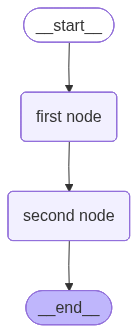

In [40]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
answer = app.invoke({"name": "Alex", "age": "24"})

{'name': 'Alex', 'age': '24', 'final': 'Hi Alex!'}

{'name': 'Alex', 'age': '24', 'final': 'Hi Alex! You are 24 years old!'}
